# Анализ и сегментация клиентов банка по количеству продуктов

### Задача**:**

Проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

### Цель:
Предложение решений для снижения оттока клиентов для менеджера продукта.

### **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Декомпозиция :

#### Шаг 1 : Загрузка данных и библиотек
Первый взгляд на данные,приведение данных в удобный для работы вид.

#### Шаг 2 : Предобработка
Работа с пропусками,дубликатами и выбросами.
Примем решение о фильтрации данных и заполнению пропусков.

#### Шаг 3 : Исследовательский анализ данных
Анализ распределения данных и построение графиков.

#### Шаг 4 : Сегментация
Разделение данных на сегменты и установление законномерностей в них.
Построение графиков.

#### Шаг 5: Статистическая проверка гипотез
Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. Сформируем и проверим еще одну гипотезу на основании данных.

#### Шаг 6: Выводы и рекомендации
Сделаем выводы на основании анализа. 
Предоставим рекомендации для продуктового менеджера по вводу новых продуктов в рамках проделанной работы с сегментами пользователей на основе данных.

### Шаг 1 Загрузка данных и библиотек

In [1]:
import pandas as pd # загружаем библиотеки
from IPython.display import display
import numpy as np
from numpy import median
import seaborn as sns
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st


In [3]:
df.info() #смотрим 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.duplicated().sum() # проверяем на дубликаты

0

In [6]:
df.isna().sum() # смотрим пропуски

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

In [7]:
df = df.rename(columns={'userid':'user_id','City':'city','Gender':'gender','Age':'age','Objects':'objects','Balance':'balance','Products':'products','CreditCard':'credit_card','Loyalty':'loyalty','Churn':'churn'})
df.info() # меняем название колонок 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe() # смотрим на значения в числовых колонках

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
print('Города в датасете: ',df['city'].unique()) # смотрим города

Города в датасете:  ['Ярославль' 'Рыбинск' 'Ростов Великий']


In [10]:
# меняем типы данных в столбцах
df['credit_card'] = df['credit_card'].astype('bool')
df['loyalty'] = df['loyalty'].astype('bool')
df['churn'] = df['churn'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  bool   
 9   loyalty           10000 non-null  bool   
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 732.5+ KB


Всего 10 000 строк,представлены клиенты из 3 городов.
В столбцах со значениями 0 и 1 меняем на тип bool для дальнейшей работы.
Возраст клиентов от 18 до 92.
Объекты в собственности от 0 до 10.
Продукты от 1 до 4.
С выбросами и пропусками будем разбираться на следующем шаге.

### Шаг 2 : Предобработка

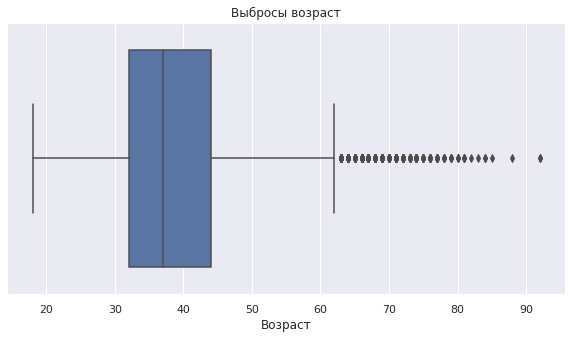

In [11]:
sns.set(rc={'figure.figsize':(10,5)}) # посмотрим выбросы в числовых колонках
sns.boxplot(x='age', data=df)
plt.title('Выбросы возраст')
plt.xlabel('Возраст')
plt.show();

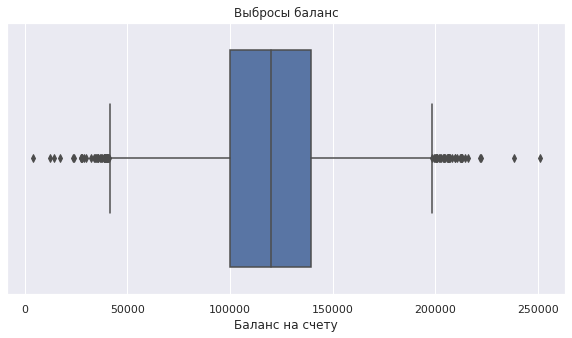

In [12]:
sns.set(rc={'figure.figsize':(10,5)}) # посмотрим выбросы в числовых колонках
sns.boxplot(x='balance', data=df)
plt.title('Выбросы баланс')
plt.xlabel('Баланс на счету')
plt.show();

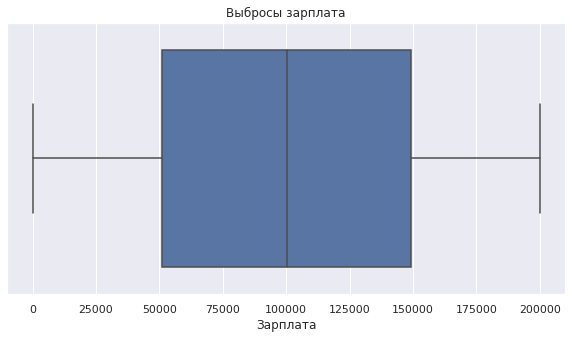

In [13]:
sns.set(rc={'figure.figsize':(10,5)}) # посмотрим выбросы в числовых колонках
sns.boxplot(x='estimated_salary', data=df)
plt.title('Выбросы зарплата')
plt.xlabel('Зарплата')
plt.show();

По выбросам видим аномалии для клиентов с возрастом свыше 62 лет и балансом менее 40 000 и больше 200 000.
По зарплате выбросов не видим.

In [14]:
print('Клиенты старше 62 лет:', len(df.query('age > 62'))) # смотрим на количество выбросов и % от общего числа
print('Процент клиентов старше 62 в датасете % :', round(len(df.query('age > 62'))/len(df)*100, 2))

Клиенты старше 62 лет: 359
Процент клиентов старше 62 в датасете % : 3.59


In [15]:
print('Клиенты с балансом до 40 000 и свыше 200 000 :', len(df.query('balance < 40000 or balance > 200000')))
print('Процент клиентов старше 62 в датасете % :', round(len(df.query('balance < 40000 or balance > 200000'))/len(df)*100, 2))

Клиенты с балансом до 40 000 и свыше 200 000 : 63
Процент клиентов старше 62 в датасете % : 0.63


Выбросы составляют суммарно менее 5 %,поэтому пожем отсеять.

In [16]:
df.drop(df.query('age > 62').index,inplace=True) # фильтруем и проверяем
df.drop(df.query('balance < 40000 or balance > 200000').index,inplace=True)
df.describe()

,user_id,score,age,objects,balance,products,estimated_salary
count,9.581000e+03,9581.000000,9581.000000,9581.000000,6098.000000,9581.000000,9581.000000
mean,1.573364e+07,650.300595,37.791880,5.017952,119740.764234,1.532304,100091.643383
std,7.183700e+04,96.737147,8.805999,2.889021,28876.878459,0.581845,57519.327330
min,1.560844e+07,350.000000,18.000000,0.000000,40105.510000,1.000000,11.580000
25%,1.567129e+07,583.000000,32.000000,3.000000,100370.117500,1.000000,50974.570000
50%,1.573375e+07,651.000000,37.000000,5.000000,119785.240000,1.000000,100187.430000
75%,1.579565e+07,717.000000,43.000000,7.000000,139217.690000,2.000000,149384.430000
max,1.585843e+07,850.000000,62.000000,10.000000,199689.490000,4.000000,199992.480000


In [17]:
df_balance_nan = df.query('balance.isna()') # создадим новый датасет для анализа пропусков
df_balance_nan.describe()

,user_id,score,age,objects,balance,products,estimated_salary
count,3.483000e+03,3483.000000,3483.000000,3483.000000,0.0,3483.000000,3483.000000
mean,1.573434e+07,649.167384,37.233994,5.079529,NaN,1.784094,99089.122791
std,7.172185e+04,96.402438,8.620906,2.854351,NaN,0.495134,57689.907084
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,90.070000
25%,1.567177e+07,582.000000,31.000000,3.000000,NaN,1.500000,49528.730000
50%,1.573550e+07,651.000000,36.000000,5.000000,NaN,2.000000,98618.790000
75%,1.579567e+07,717.000000,42.000000,7.000000,NaN,2.000000,148409.435000
max,1.585810e+07,850.000000,62.000000,10.000000,NaN,4.000000,199992.480000


In [18]:
df_balance_nan_pr = df.groupby('products')['user_id'].count().reset_index().sort_values(by='user_id',ascending=False) 
df_balance_nan_pr.columns = ['products', 'user_id']
df_balance_nan_pr # по количеству клиентов с разным количестовом продуктов также не вижу аномалий

,products,user_id
0,1,4851
1,2,4419
2,3,252
3,4,59


In [19]:
for column in ['city','products','credit_card','loyalty', 'churn']: # посмотрим соотношение пропусков категоральными переменными
    print(column)
    print(round(df_balance_nan[column].value_counts(normalize=True),2))
    print()   

city
Ярославль    0.67
Рыбинск      0.33
Name: city, dtype: float64

products
2    0.72
1    0.25
3    0.03
4    0.00
Name: products, dtype: float64

credit_card
True     0.72
False    0.28
Name: credit_card, dtype: float64

loyalty
True     0.5
False    0.5
Name: loyalty, dtype: float64

churn
False    0.86
True     0.14
Name: churn, dtype: float64



В предобработке убрал выбросы.
Больше всего пропусков у клиентов в г Ярославль,с 2 продуктами,с кредитной картой,также больше клиентов с оттоком.
Возможно ошибка связана с неккоректной выгрузков по городам.
Пропуски решил не заполнять,чтобы не искажать данные.

### Шаг 3 : Исследовательский анализ данных

In [20]:
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,True,True,101348.88,True
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,False,True,112542.58,False
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,True,False,113931.57,True
3,15744090,699,Ярославль,Ж,39,1,NaN,2,False,False,93826.63,False
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,True,True,79084.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,True,False,96270.64,False
9996,15612628,516,Ярославль,М,35,10,57369.61,1,True,True,101699.77,False
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,False,True,42085.58,True
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,True,False,92888.52,True


Пострим в общие графики с целью посмотреть распределение(добавил автоматизацию циклом)

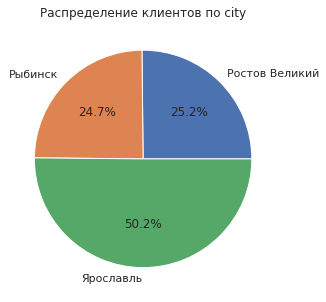

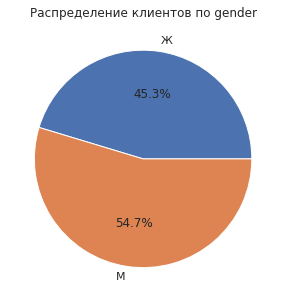

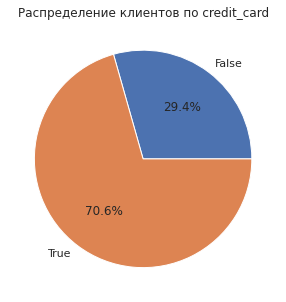

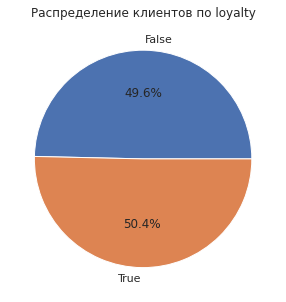

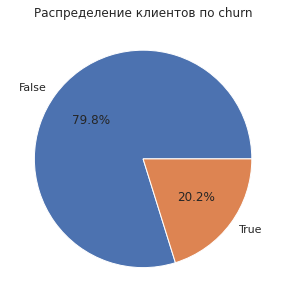

In [21]:
for column in ['city','gender','credit_card','loyalty','churn']:
    data = df.groupby(column).agg({'user_id': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(data['user_id'], labels=data.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по {column}')
    plt.show()

Большинстсво клиентов живет в Ярославле(что не удивительно,ведь он больше),по полу чуть больше мужчин.
Также видим что 70 % клиентов являются обладателями кредитных карт.
По лояльности клиенты разбиты почти пополам.
К оттоку склонны 20,2 % от всех клиентов.

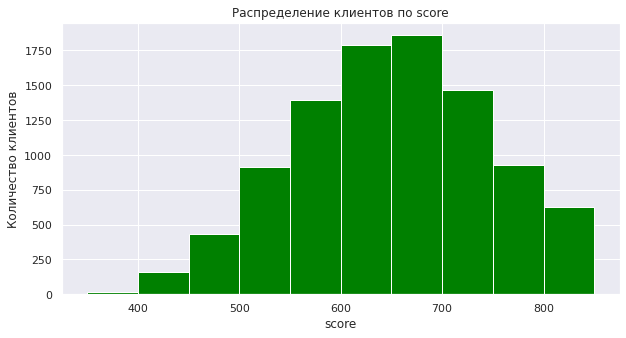

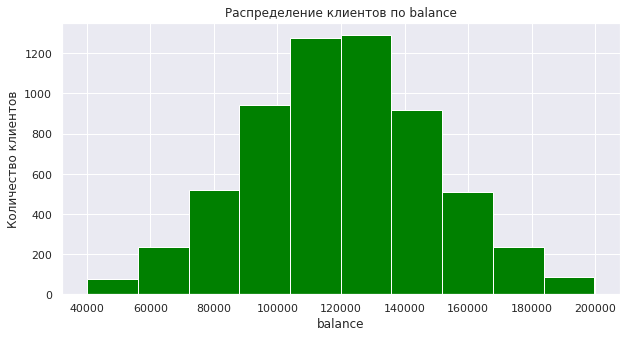

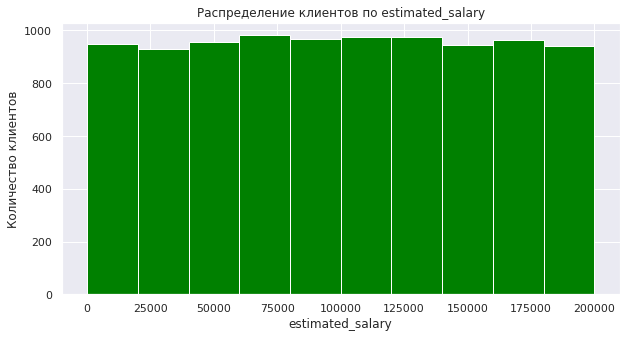

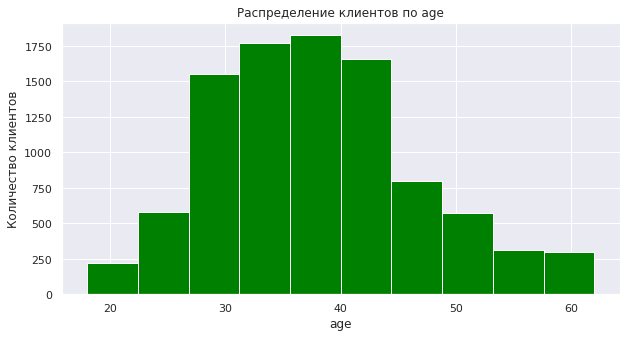

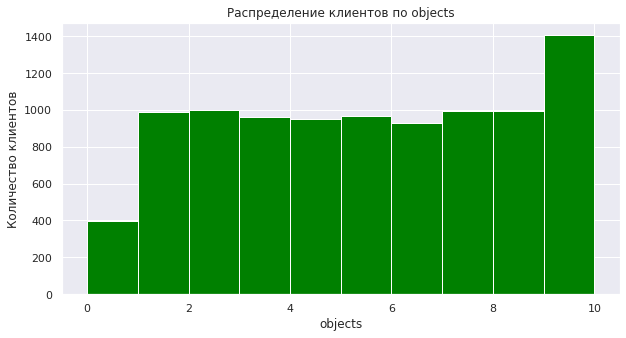

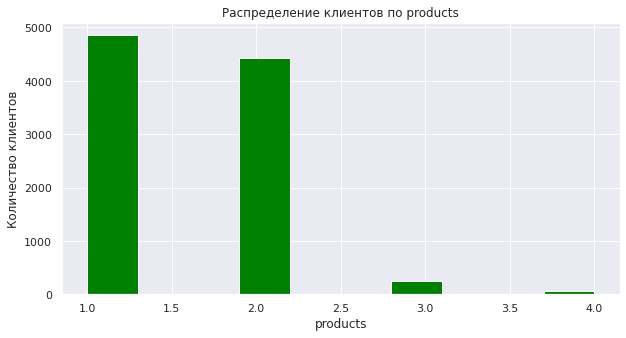

In [22]:
for column in ['score','balance','estimated_salary','age','objects', 'products']:
    plt.hist(df[column],color = 'green')
    plt.ylabel("Количество клиентов")
    plt.xlabel(column)
    plt.title(f'Распределение клиентов по {column}')
    plt.show()

У большинства клиентов от 600-700 кредитный рейтинг.
По балансу большинство клиентов имеют на счетах от 100 000 до 140 000.
По зарплате почти равное количество клиентов по всем количественным отметкам.
По возрасту клиенты в большинстве своем от 25 до 45 лет.
По объектам в собственности меньше всего клиентов с 1 и больше всего с 10.
По продуктам большинство клиентов с 1,далее 2,больше 2 продуктов имеет меньшинство клиентов.


Построим матрицу корреляций на числовых признаках.

In [23]:
dff=df.copy()

In [24]:
dff = pd.get_dummies(dff,columns=['city','gender'], drop_first = False)
dff.head()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,42,2,NaN,1,True,True,101348.88,True,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,False,True,112542.58,False,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,True,False,113931.57,True,0,0,1,1,0
3,15744090,699,39,1,NaN,2,False,False,93826.63,False,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,True,True,79084.10,False,0,1,0,1,0


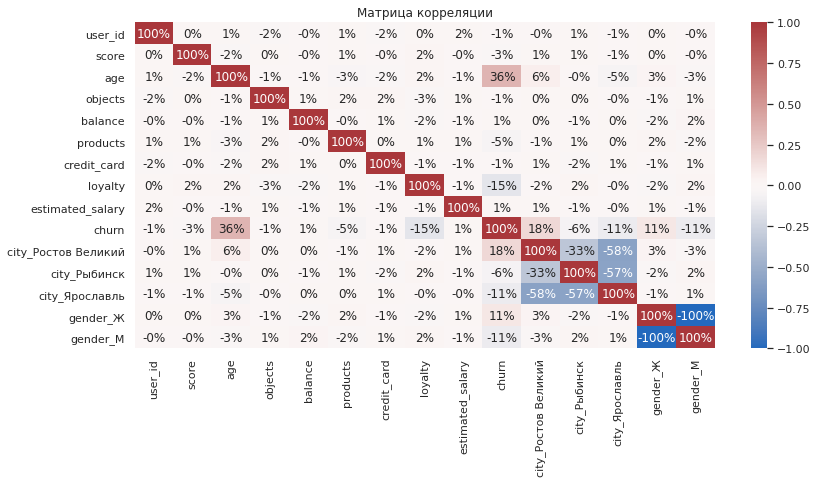

In [25]:
# Построим матрицу корреляции
plt.figure(figsize=(13,6))
heat = sns.heatmap(dff.corr(), vmin = -1, vmax = 1,annot=True, fmt=".0%", cmap='vlag')
heat.set_title('Матрица корреляции');
plt.show()

Сильно коррелириущих признаков не выявлено,есть небольшая зависимость между возрастом и оттоком и городом Ростов.

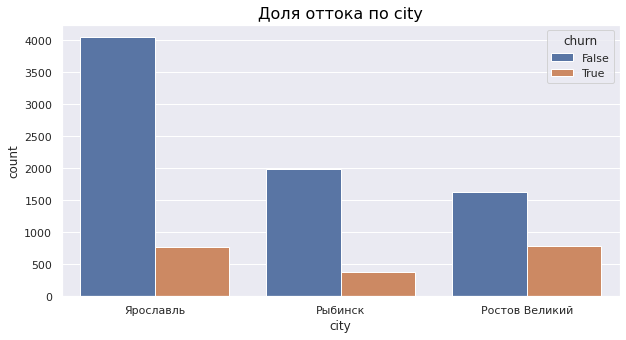

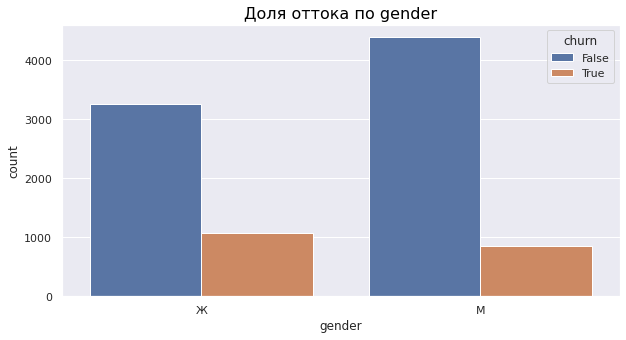

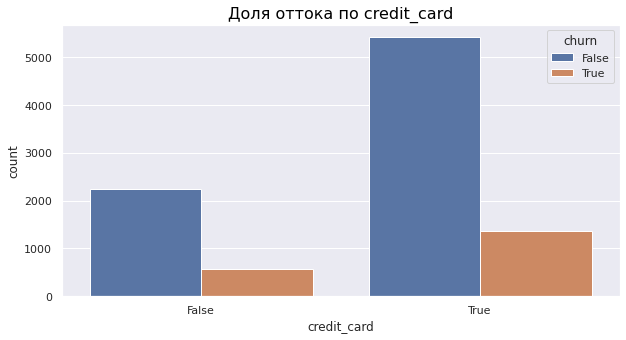

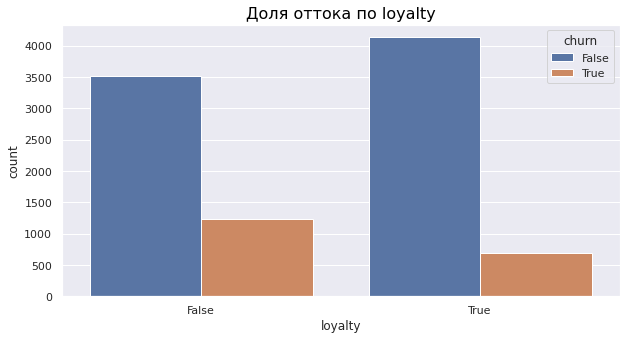

In [26]:
for column in ['city','gender','credit_card','loyalty']:
        ax = sns.countplot(data=df, x=column, hue='churn')
        plt.title(f'Доля оттока по {column}', fontsize = 16, color = 'black')
        plt.show()    

Больше всего клиентов уходило в г Ростов. Чуть чаще уходят женщины, а не мужчины. 
Отношение уходящих с и без кредитной карты почти одинаковое.
Лояльные клиенты уходили реже,чем не лояльные.


### Шаг 4 : Сегментация клиентов в разрезе количества используемых продуктов

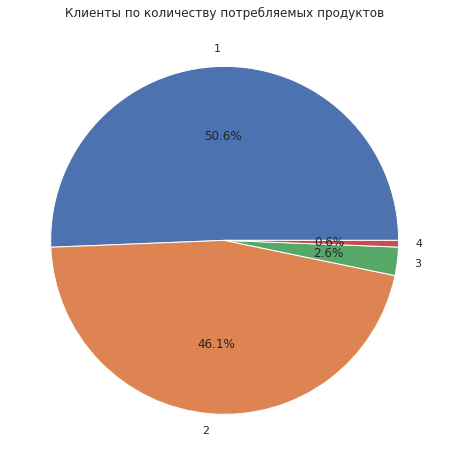

In [27]:
df_products = df.groupby('products')['products'].count() # посмотрим сколько всего в группах клиентов
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(df_products,labels=df_products.index, autopct='%1.1f%%')
ax1.set_title('Клиенты по количеству потребляемых продуктов');

Стоит выделить 2 самых больших сегмента и с ними работать,тем более что они почти равны по количеству пользователей.

In [28]:
df_segment = df.query('products == 1 or products == 2')


In [29]:
df_segment.describe()

,user_id,score,age,objects,balance,products,estimated_salary
count,9.270000e+03,9270.000000,9270.000000,9270.000000,5893.000000,9270.000000,9270.000000
mean,1.573354e+07,650.367853,37.630097,5.017584,119750.728597,1.476699,99944.736345
std,7.177614e+04,96.732073,8.753481,2.889114,28857.822848,0.499484,57560.121028
min,1.560844e+07,350.000000,18.000000,0.000000,40105.510000,1.000000,11.580000
25%,1.567127e+07,583.000000,31.250000,3.000000,100254.760000,1.000000,50599.017500
50%,1.573372e+07,652.000000,37.000000,5.000000,119787.760000,1.000000,100038.165000
75%,1.579555e+07,718.000000,43.000000,7.000000,139224.920000,2.000000,149317.997500
max,1.585843e+07,850.000000,62.000000,10.000000,199689.490000,2.000000,199992.480000


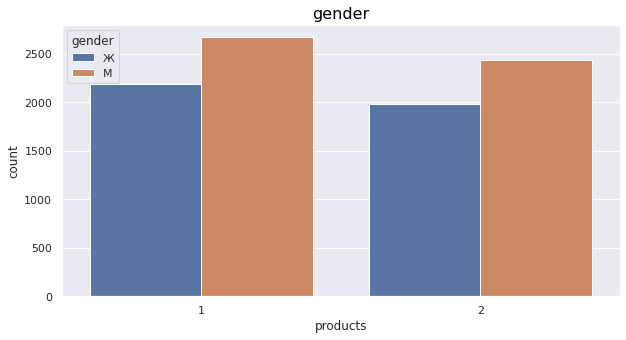

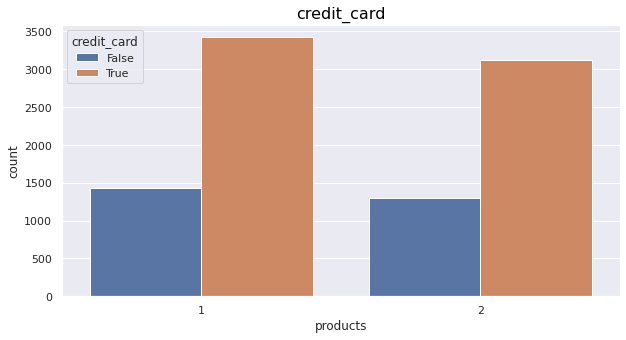

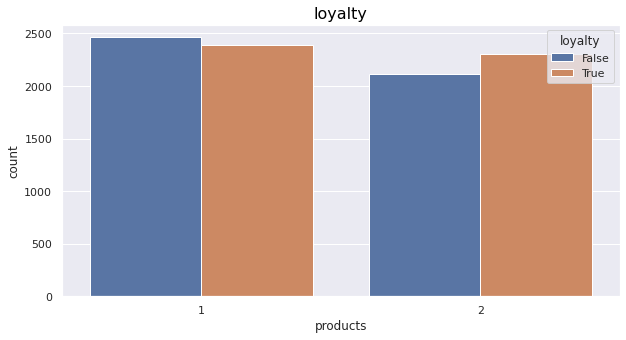

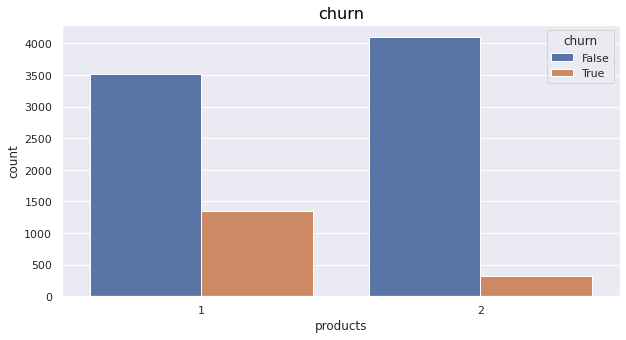

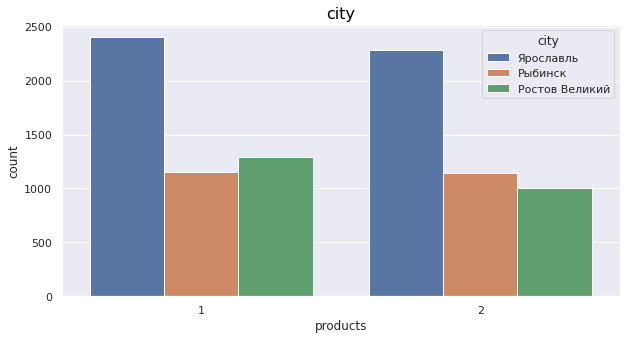

In [30]:
for column in ['gender','credit_card','loyalty', 'churn','city']:
        ax = sns.countplot(data=df_segment, x='products', hue=column);
        plt.title(column, fontsize = 16, color = 'black')
        plt.show()

In [31]:
df_segment_churn = df_segment.groupby('products').agg({'user_id': 'count','churn': 'sum'}).reset_index()
df_segment_churn['percent_churn'] = round(df_segment_churn['churn']/df_segment_churn['user_id']*100)
df_segment_churn

,products,user_id,churn,percent_churn
0,1,4851,1342,28.0
1,2,4419,324,7.0


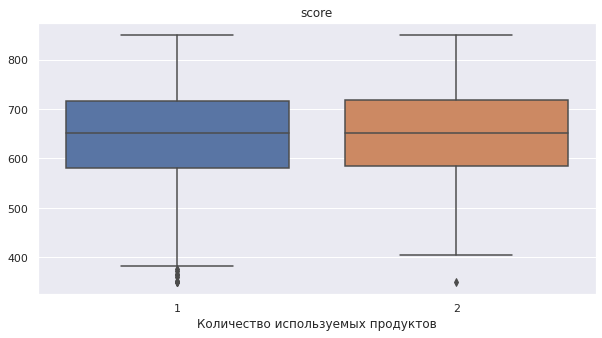

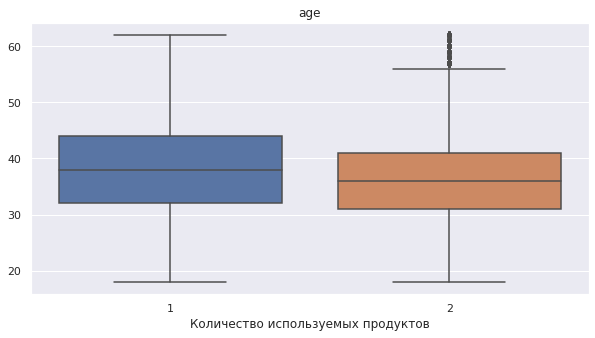

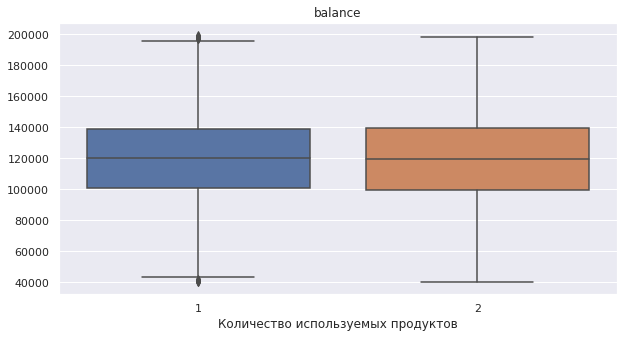

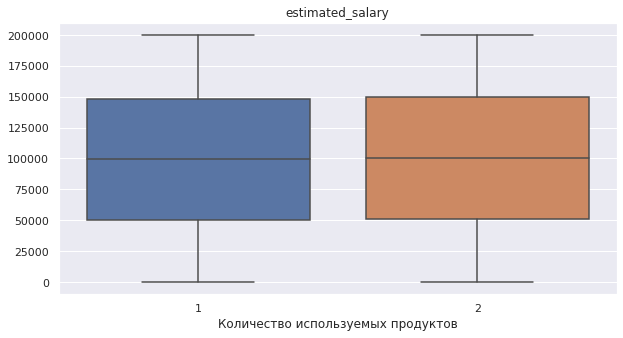

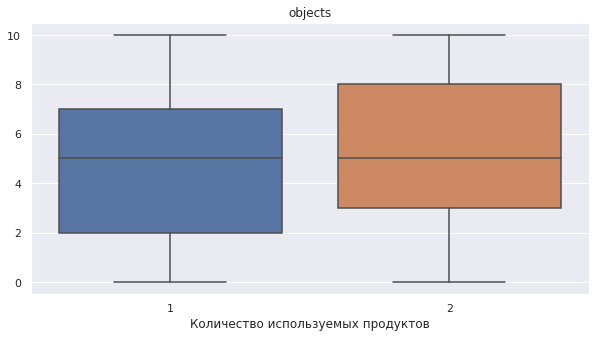

In [32]:
for column in ['score','age','balance','estimated_salary', 'objects']:
    plt.figure()
    sns.boxplot(data=df_segment, y = column, x = 'products')
    plt.xlabel('Количество используемых продуктов')
    plt.ylabel('')
    plt.title(column)
    plt.show();

#### Итог сегментации : 2 сегмента.

* 1 сегмент :

- Количество продуктов - 1
- Большинство проживает в Ярославле 
- Большинство мужчин
- Средний возраст чуть менее 40 лет
- Большинство с кредитной картой
- Отношение лояльных и нелояльных почти поровну
- Отток 28% 


* 2 сегмент:

- Количество продуктов - 2
- Большинство проживает в Ярославле
- Большинство мужчин
- Средний возраст чуть менее 40 лет
- Большинство с кредитной картой
- Лояльных клиентов чуть больше
- Отток мал и составляет 7%

Касательно зарплаты,объектов недвижимости и баланса сегменты почти одинаковы.







### Шаг 5: Статистическая проверка гипотез

#### Гипотеза N 1 

Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

* Н-0: возраст клиентов, пользующихся одним продуктом банка равен возрасту клиентов, пользующихся двумя продуктами
* Н-А: возраст клиентов, пользующихся одним продуктом банка не равен возрасту клиентов, пользующихся двумя продуктами

In [33]:
gr_1 = df[(df['products']==1)]['age']
gr_2 = df[(df['products']==2)]['age']
print('Клиенты с 1 продуктом:',len(gr_1))
print('Клиенты с 2 продуктами:',len(gr_2))

Клиенты с 1 продуктом: 4851
Клиенты с 2 продуктами: 4419


In [34]:
results = st.ttest_ind(gr_1, gr_2, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.6172135774937404e-25
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, возраст клиентов с 1 продуктом не равен возрасту клиентов с 2.

### Гипотеза N 2

Проверим гипотезу о различии дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним


* Н-0: средний доход клиентов, пользующихся одним продуктом банка равен среднему доходу клиентов, пользующихся двумя продуктами
* Н-А: средний доход клиентов, пользующихся одним продуктом банка не равен среднему доходу клиентов, пользующихся двумя продуктами

In [39]:
gr_1 = df[(df['products']==1)]['estimated_salary']
gr_2 = df[(df['products']==2)]['estimated_salary']
print('Клиенты с 1 продуктом:',len(gr_1))
print('Клиенты с 2 продуктами:',len(gr_2))

Клиенты с 1 продуктом: 4851
Клиенты с 2 продуктами: 4419


In [40]:
results = st.ttest_ind(gr_1, gr_2, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.47677914848674097
Не получилось отвергнуть нулевую гипотезу


Разницы в доходах у клиентов с одним и двумя продуктами не наблюдается.

### Шаг 6: Выводы и рекомендации

#### Общие выводы:
* Большинстсво клиентов живет в Ярославле(что не удивительно,ведь он больше),по полу чуть больше мужчин. 
* Также видим что 70 % клиентов являются обладателями кредитных карт. По лояльности клиенты разбиты почти пополам. К оттоку склонны 20,2 % от всех клиентов.
* У большинства клиентов от 600-700 кредитный рейтинг. По балансу большинство клиентов имеют на счетах от 100 000 до 140 000. По зарплате почти равное количество клиентов по всем количественным отметкам. По возрасту клиенты в большинстве своем от 25 до 45 лет. По объектам в собственности меньше всего клиентов с 1 и больше всего с 10. По продуктам большинство клиентов с 1,далее 2,больше 2 продуктов имеет меньшинство клиентов.

#### Итоги сегментации:

* 1 сегмент :

- Количество продуктов - 1
- Большинство проживает в Ярославле 
- Большинство мужчин
- Средний возраст чуть менее 40 лет
- Большинство с кредитной картой
- Отношение лояльных и нелояльных почти поровну
- Отток 28% 


* 2 сегмент:

- Количество продуктов - 2
- Большинство проживает в Ярославле
- Большинство мужчин
- Средний возраст чуть менее 40 лет
- Большинство с кредитной картой
- Лояльных клиентов чуть больше
- Отток мал и составляет 7%

Касательно зарплаты,объектов недвижимости и баланса сегменты почти одинаковы.

#### Гипотезы:
* Возраст клиентов с 1 продуктом не равен возрасту клиентов с 2.
* Разницы в доходах у клиентов с одним и двумя продуктами не наблюдается.

#### Рекомендации для продуктового менеджера:
* 1 сегмент:
Необходимо сформировать предложение для оформления доп.продукта(т.к. во 2 сегменте меньший отток),это могут быть доп.сервисы к кредитным картам или другие продукты.Увеличить лояльность пользователей. В зависимости от продукта предложить выгодные условию,например повышенный кешбек, увеличенные лимиты на транзакции.

* 2 сегмент:
Самый молодой сегмент.Меньше всего отток,поэтому рекомендуем развивать сервисные составляющие уже оформленных продуктов и повышать лояльность.Например,предложить выпустить КК карту с беспроцентный периодом и повышенным лимитом.



### Дашборд : https://public.tableau.com/app/profile/nikolay.shilyaev/viz/_16883109220910/sheet2?publish=yes